In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
import sys
sys.path.append('../../')
from giagrad import Tensor
import string
from itertools import chain
from math import floor
import numpy as np
import torch
from giagrad.nn.layers.convs.params import ConvParams
# np.random.seed(1234)
# alphabet = [chr(i) for i in chain(range(33,127), range(161, 1500))]
# # Channels out, Channels in, kernel Height, kernel Width
# def kernel(Cout, Cin, *args, a=0, b=4):
#     return np.random.randint(a, b, (Cout, Cin)+(args))

# def dataBatched(*args):
#     return np.array(alphabet[:np.prod(args)], dtype=object).reshape(args)
# #     return np.random.randint(-1000, 1000, (N, Cin, Hin, Win, Din))

# # define size
# N, Cin, Hin, Win = 1, 2, 3, 3
# kH, kW = (kernel_size := (5, 5))
# Cout = 2
# # DATA
# data = dataBatched(N, Cin, Hin, Win)
# # random KERNEL
# k = kernel(Cout, Cin, kH, kW)

# x = Tensor(data)
# w = Tensor(k)


# params = ConvParams(
        # kernel_size=(2,2),
        # stride=(1,2),
        # dilation=(2,1),
        # padding=1,
        # padding_mode='constant',
        # padding_kwargs={},
        # groups=1,
    # )
# 
# print(params.kernel_size)
# print(params.stride)
# print(params.dilation)
# print(params.padding)
# print(params.padding_mode)

torch.manual_seed(123)

x = torch.randint(high=4, size=(1, 2, 5, 5), dtype=torch.float32, requires_grad=True)
cnn2d = torch.nn.Conv2d(
        in_channels=2, 
        out_channels=1, 
        kernel_size=2, 
        stride=2,
        padding=3,
)
cnn2d.weight.data *= 20
cnn2d.weight.data //= 1
print('x:\n', x)
print('filters:\n', cnn2d.weight)
out = cnn2d(x)
print('output cnn:\n', out)

# backward
z = out.sum()
z.backward(retain_graph=True)

print('x gradient:\n', x.grad)
print('filters gradient:\n', cnn2d.weight.grad)
print(out.shape)

from torchviz import make_dot
from graphviz import Source

graph = make_dot(z)


x:
 tensor([[[[2., 1., 2., 2., 0.],
          [2., 2., 1., 3., 2.],
          [3., 1., 2., 1., 0.],
          [1., 2., 3., 1., 0.],
          [2., 0., 3., 1., 3.]],

         [[2., 1., 0., 0., 0.],
          [0., 1., 3., 3., 2.],
          [0., 3., 2., 0., 3.],
          [0., 1., 0., 3., 1.],
          [3., 0., 0., 0., 2.]]]], requires_grad=True)
filters:
 Parameter containing:
tensor([[[[ 2.,  1.],
          [ 1.,  2.]],

         [[-1., -7.],
          [-5.,  6.]]]], requires_grad=True)
output cnn:
 tensor([[[[ 2.1133e-02,  2.1133e-02,  2.1133e-02,  2.1133e-02,  2.1133e-02],
          [ 2.1133e-02,  1.6021e+01,  2.1133e-02,  2.0211e+00,  2.1133e-02],
          [ 2.1133e-02,  8.0211e+00, -1.4979e+01,  1.0021e+01,  2.1133e-02],
          [ 2.1133e-02,  2.3021e+01,  1.2021e+01,  1.1021e+01,  2.1133e-02],
          [ 2.1133e-02,  2.1133e-02,  2.1133e-02,  2.1133e-02,  2.1133e-02]]]],
       grad_fn=<ConvolutionBackward0>)
x gradient:
 tensor([[[[ 2.,  1.,  2.,  1.,  2.],
          [ 1., 

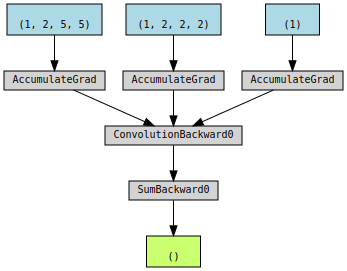

In [12]:
graph